<a href="https://colab.research.google.com/github/guilhermedefalque/Breast-Cancer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das bibliotecas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#importação do keras
import keras
from keras.models import Sequential
from keras.layers import Dense #Camada densa na rede neural: cada um dos neurônios é interligado com todos os outros neurônicos
# presentes na camada subsequênte (veja a imagem a baixo) -> também chamada de rede neural fully conected

from sklearn.metrics import confusion_matrix, accuracy_score

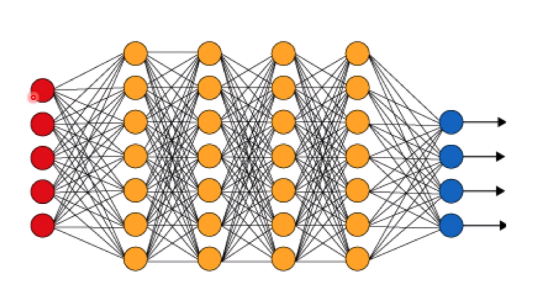


#Importação dos dados

In [3]:
previsores = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets e Colabs/Breast_Cancer_Simples/entradas_breast.csv')
classe = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets e Colabs/Breast_Cancer_Simples/saidas_breast.csv')

#Usando Hodout

#Separação dos dados em treino e teste

In [ ]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

#Criação de rede neural

##Considerações sobre os parâmetros:

###adicionar a primeira camada oculta:

**unit** -> quantidade de neurônios na camada intermediária (oculta). Para a escolha, é feito o seguinte cálculo

Quant_Neuro = (número_de_neurônios_camada_entrada + somátório de neurônios na camada de saída)/2

Nesse exemplo temos: 30 neurônios na camada de entrada (30 atributos) e um neurônio na camada de saída (classe 1 ou 0), logo

A quantidade de neurônios na camada intermediárioa é: (30+1)/2 = teto[15.5] = 16 

Isso é visto como um ponto de partida para se adicionar neurônios nas camadas intermediárias

**activation** -> função de ativação que irá ser inserida (pode ser relu, linear, sigmóide, etc)

**kernel_initializer** -> como os pesos serão inicializados. Pode-ser utilizar o random_uniform para gerar pesos aleatórios

**input_dim** = quantiade de elementos que existem na camada de entrada. Nesse exemplo, temos 30 atributos, logo teremos 30 elementos na camada de entrada

#A rede neural criada resumidamente: (não são somente os dois primeiros neurônios que estão ligados aos demais da camada intermediária. Todos os demais neurônios da camada de entrada estãoligados aos neurônios da camada oculta). A imagem é meramente ilustrativa. 

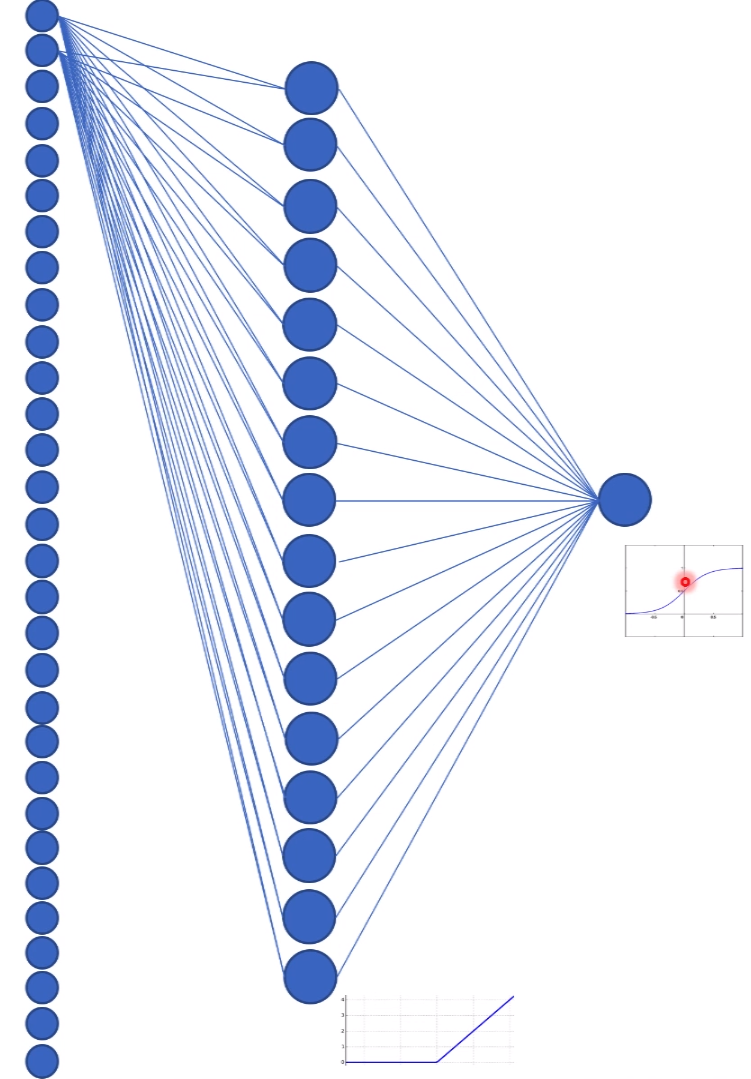

In [ ]:
classificador = Sequential()
#Cria uma camada intermediária
classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))

#Cria uma segunda camada intermediária
classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

#Cria terceira camada intermediária
classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

#Criar uma camada de saída
classificador.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'random_uniform'))

#Compilando a rede neural

##Parâmetros:

**optimizer** = recebe o modelo de atualização dos pesos que será utilizado. Ex: 'adam', utiliza o gradiente estocástico. Quando se coloca apenas adam, por exemplo, os parâmetros como taxa de aprendizagem, decay (aumento e diminuição automática do learning rate), etc, são colocados por default.

**loss** = tratamento e cálculo do erro. Função de perda. Pode-se utilizar, por exemplo: mean_squared_error, mean_absolute_error, mean_abosolute_percentage_error, binary_crossentropy (classificação binária), categorical_crossentropy (para mais de uma classe), etc.

**metrics** = escolha do método para cálculo dos resultados. 'binary_accuracy' é um método para cálculo da acurácia, por exemplo.

In [ ]:
#classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

##Usando compile não default

**learning_rate** = learning rate (taxa de aprendizagem);

**decay**: dimiu o valor da taxa de aprendizagem a cada interação com a finalidade de otimizar o processo de tempo de encontrar a solução ótima;

**clipvalue** = congela o valor dos parâmetros theta a fim de não permitir que o erro encontrado no gradiente descendente aumente ou fique "quicando", não permitindo o encontro da solução ótima (varia de -0.5 até 0.5). 

In [ ]:
otimizador = keras.optimizers.Adam(learning_rate = 0.001, decay = 0.0001, clipvalue = 0.5)
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

#Treinar modelo

##Parâmetors:

**batch_size**: tamanho do lote utilizando gradiente estocástico.

**epochs**: quantidade de épocas que se deseja executar o treinamento.

In [ ]:
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs=100)

#Veificando pesos

In [ ]:
pesos0 = classificador.layers[0].get_weights()
#print(pesos0)
print(len(pesos0))
pesos1 = classificador.layers[1].get_weights()
#print(pesos0)
print(len(pesos1))
pesos2 = classificador.layers[2].get_weights()
#print(pesos0)
print(len(pesos2))


2
2
2


#Previsões

In [ ]:
#Usando sklearn
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes > 0.5)
precisao = accuracy_score(classe_teste, previsoes)
print(precisao)
matriz = confusion_matrix(classe_teste, previsoes)
print(matriz)

#Usando Keras
resultado = classificador.evaluate(previsores_teste, classe_teste)
print(resultado)

#Usando Cross-Validation

##Importando bibliotecas para validação-cruzada

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

##Recriando a rede Neural (Para detalhes, veja a criação no Hodout) e Utilizando o Kerar para criar o classificador com Cross-Validation

In [ ]:
def criaRede():
  classificador = Sequential()
  #Cria uma camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))

  #Cria uma segunda camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

  #Cria terceira camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

  #Criar uma camada de saída
  classificador.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'random_uniform'))

  otimizador = keras.optimizers.Adam(learning_rate = 0.001, decay = 0.0001, clipvalue = 0.5)

  classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn = criaRede, epochs = 100, batch_size = 10)
resultados = cross_val_score(estimator = classificador, X = previsores, y = classe, cv = 10, scoring = 'accuracy')
print(resultados)
media = resultados.mean()
print(media)

#cálculo do desvio padrão
desvio = resultados.std()
print(desvio)

#Dropout

##Dropout: técnica utilizada para diminuir overfitting. A ideia é zerar alguns valores de neurônios da camada de entrada. Os valores são usados aleatoriamente. Normalmente se utiliza 20 - 30% para evitar overfitting. Ele sempre é feito após criar a camada de entrada.

Para importar: from keras.layers import Dropout. O exemplo abaixo importa o dropout. 

In [ ]:
from keras.layers import Dropout

In [ ]:
def criaRede():
  classificador = Sequential()
  #Cria uma camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))

  #cria dropout e pega 20% dos neurônios da camada de entrada os zera
  classificador.add(Dropout(0.2))

  #Cria uma camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

  #cria dropout e pega 20% dos neurônios na camada intermediária
  classificador.add(Dropout(0.2))

  #Cria terceira camada intermediária
  classificador.add (Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))

  #Criar uma camada de saída
  classificador.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'random_uniform'))

  otimizador = keras.optimizers.Adam(learning_rate = 0.001, decay = 0.0001, clipvalue = 0.5)

  classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn = criaRede, epochs = 100, batch_size = 10)
resultados = cross_val_score(estimator = classificador, X = previsores, y = classe, cv = 10, scoring = 'accuracy')
print(resultados)
media = resultados.mean()
print(media)

#cálculo do desvio padrão
desvio = resultados.std()
print(desvio)

#Usando o GridSearch

##Importações

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

#importação do keras
import keras
from keras.models import Sequential
from keras.layers import Dense #Camada densa na rede neural: cada um dos neurônios é interligado com todos os outros neurônicos
# presentes na camada subsequênte (veja a imagem a baixo) -> também chamada de rede neural fully conected

#Dropout
from keras.layers import Dropout

#Umas das biliotecas de validação cruzada
from keras.wrappers.scikit_learn import KerasClassifier

#importação do gridsearch
from sklearn.model_selection import GridSearchCV

##Importação dos dados novamente



In [7]:
previsores = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets e Colabs/Breast_Cancer_Simples/entradas_breast.csv')
classe = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets e Colabs/Breast_Cancer_Simples/saidas_breast.csv')

##Criação do modelo otimizado

In [ ]:
def criaRede(optimizer, loos, kernel_initializer, activation, neurons):
  classificador = Sequential()
  #Cria uma camada inicial
  classificador.add (Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer, input_dim = 30))

  #cria dropout e pega 20% dos neurônios da camada de entrada os zera
  classificador.add(Dropout(0.2))

  #Cria uma camada intermediária
  classificador.add (Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))

  #cria dropout e pega 20% dos neurônios na camada intermediária
  classificador.add(Dropout(0.2))

  #Cria uma camada intermediária
  classificador.add (Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))

  #cria dropout e pega 20% dos neurônios na camada intermediária
  classificador.add(Dropout(0.2))

  #Cria uma camada intermediária
  classificador.add (Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))

  #cria dropout e pega 20% dos neurônios na camada intermediária
  classificador.add(Dropout(0.2))

  #Criar uma camada de saída
  classificador.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = kernel_initializer))

  classificador.compile(optimizer = optimizer, loss = loos, metrics = ['binary_accuracy'])
  return classificador

classificador = KerasClassifier(build_fn = criaRede)
parametros = {'batch_size': [10, 30], 
              'epochs': [150], 
              'optimizer': ['adam'], 
              'loos': ['binary_crossentropy', 'hinge'], 
              'kernel_initializer': ['random_uniform', 'normal'], 
              'activation': ['relu', 'tanh'], 
              'neurons': [32]}
#resultados = cross_val_score(estimator = classificador, X = previsores, y = classe, cv = 10, scoring = 'accuracy')
grid_search = GridSearchCV(estimator = classificador, param_grid=parametros, scoring='accuracy', cv=5)
grid_search = grid_search.fit(previsores, classe)

melhores_parametros = grid_search.best_params_
melhor_precisao = grid_search.best_score_
print(melhores_parametros)
print(melhor_precisao)


#Classificar apenas um registro

###O cliente quer verificar se uma pessoa tem cancer ou não. Como se faz para verificar apenas um registro?

##Importação dos dados

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#importação do keras
import keras
from keras.models import Sequential
from keras.layers import Dense #Camada densa na rede neural: cada um dos neurônios é interligado com todos os outros neurônicos
# presentes na camada subsequênte (veja a imagem a baixo) -> também chamada de rede neural fully conected

#Dropout
from keras.layers import Dropout

#Umas das biliotecas de validação cruzada
from keras.wrappers.scikit_learn import KerasClassifier

#importação do gridsearch
from sklearn.model_selection import GridSearchCV

#importa numpy
import numpy as np

##Carregamento da base de dados

In [ ]:
previsores = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/entradas_breast.csv')
classe = pd.read_csv('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/saidas_breast.csv')

##Criar o classificador após rodar o gridSearch

In [ ]:
classificador = Sequential()
#Cria uma camada intermediária
classificador.add (Dense(units = 8, activation = 'relu', kernel_initializer = 'normal', input_dim = 30))

#cria dropout e pega 20% dos neurônios da camada de entrada os zera
classificador.add(Dropout(0.2))

#Cria uma camada intermediária
classificador.add (Dense(units = 8, activation = 'relu', kernel_initializer = 'normal'))

#cria dropout e pega 20% dos neurônios na camada intermediária
classificador.add(Dropout(0.2))

#Criar uma camada de saída
classificador.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'random_uniform'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

#Treina o modelo
classificador.fit(previsores, classe, batch_size=10, epochs=100)


##Inserindo o novo registro:

In [ ]:
#Novo registro (30 atributos)
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])

previsao = classificador.predict(novo)
print(previsao) #Gera a previsão: valores mais próximos de 1, o tumor é maligno. 

previsao = (previsao > 0.5)
print(previsao) 


[[1.]]
[[ True]]


#Como salvar a rede neural criada

In [ ]:
#cria um arquivo json para o classificador
classificador_json = classificador.to_json()
#print(classificador_json)

#salva o arquivo no disco

#Salvar a estrutura da rede neural
with open('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/classificador_breast.json', 'w') as json_file:
  json_file.write(classificador_json)

#Salva os pesos da rede neural
classificador.save_weights('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/classificador_breast.h5')

#Como importar a rede neural criada

##importação

In [ ]:
import numpy as np
from keras.models import model_from_json



##Código

In [ ]:
#carrega o arquivo que contém a estrutura da rede neural
arquivo = open('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/classificador_breast.json', 'r')

#carrega a estrutura da rede neural
estrutura_rede = arquivo.read()
#libera memória
arquivo.read()

#cria a estrutura da rede neural
classificador = model_from_json(estrutura_rede)
#carrega os pesos
classificador.load_weights('/content/drive/MyDrive/Disciplinas/Estudo sobre Deep Learning/Datasets/Breast_Cancer_Simples/classificador_breast.h5')

##utilizando a rede neural carregada com um novo registro

In [ ]:
#Novo registro (30 atributos)
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178,
                  0.20, 0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015,
                  0.03, 0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185,
                  0.84, 158, 0.363]])

previsao = classificador.predict(novo)
print(previsao) #Gera a previsão: valores mais próximos de 1, o tumor é maligno. 

previsao = (previsao > 0.5)
print(previsao) 

[[1.]]
[[ True]]
